# Problem Statement
The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.

This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.

In this challenge, you will help this bank by predicting the probability that a member will default.


## Importing all required Libraries

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
# Loading train and test data sets
dftrain = pd.read_csv("train_indessa.csv")
dftest  =  pd.read_csv('test_indessa.csv')

## Data Description

In [3]:
# Head of train data set to check whether the train data is correctly loaded or not
dftrain.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
# Head of test data set to check whether the test data is correctly loaded or not
dftest.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [5]:
# Checking the shape of training and test set
print('Shape of Training Data Set is', dftrain.shape)
print('Shape of Testing Data Set is', dftest.shape)

Shape of Training Data Set is (532428, 45)
Shape of Testing Data Set is (354951, 44)


In [6]:
print(set(dftrain.columns)- set(dftest.columns))

{'loan_status'}


One column in test set is lesser than the train set because target variable 'loan_status' is not provided for test set

In [7]:
# Checking the information of each column of training set
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [8]:
# Checking the information of each column of testing set
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

In [9]:
# Droping the column member_id and checking for duplicate records
dftrain.drop(["member_id"],axis=1, inplace = True) 
test_memeber_id = dftest['member_id']
dftest.drop(["member_id"],axis=1, inplace = True)

print('Number of duplicate rows in training set are',dftrain.duplicated().sum())
print('Number of duplicate rows in testing set are',dftest.duplicated().sum())

Number of duplicate rows in training set are 0
Number of duplicate rows in testing set are 0


loan_status is the target variable while all others are the predictors.  
  
Based on the information of each column, there are missing values in both training & test data sets. Imputation need to be done to treat missing values.

Some of the variables are of object data type, Encoding needs to be done for these columns.

In [10]:
# Checking for null values in training data set
dftrain.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal   

In [11]:
# Checking for null values in testing data set
dftest.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec                            13
revol_bal   

## Data Pre Processing

### Categorical Variables

In [12]:
##Checking the value counts of categorical variables of training data
      
for i in dftrain.columns:
    if dftrain[i].dtype == 'object':
        print('Column Name :', i)
        print(dftrain[i].value_counts())
        print('\n')
    


Column Name : term
36 months    372793
60 months    159635
Name: term, dtype: int64


Column Name : batch_enrolled
              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64


Column Name : grade
B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64


Column Name : sub_grade
B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name: sub_grade, dtype: int6

Below categorical columns contain many levels of categories which may not be useful for the further analysis. So, proceeding to drop these particular columns.

['batch_enrolled','sub_grade','emp_title','desc','title','zip_code','addr_state']

Column 'verification_status_joint' contains only 305 records and remaining values are null. So, proceeding to drop this particular column

In [13]:
# Droping these columns as per the above statement in both train and test set

dftrain.drop(['batch_enrolled','sub_grade','emp_title','desc','title','zip_code','addr_state','verification_status_joint'], axis =1,inplace=True)
dftest.drop(['batch_enrolled','sub_grade','emp_title','desc','title','zip_code','addr_state','verification_status_joint'], axis =1,inplace=True)

In [14]:
# Seggregating the categorical and continuous variables of training set for analysis

dftrain_cat = dftrain.select_dtypes(exclude = ['int64','float64'])

dftrain_num = dftrain.select_dtypes(include = ['int64','float64'])

Count Plot of term


<Figure size 1440x504 with 0 Axes>

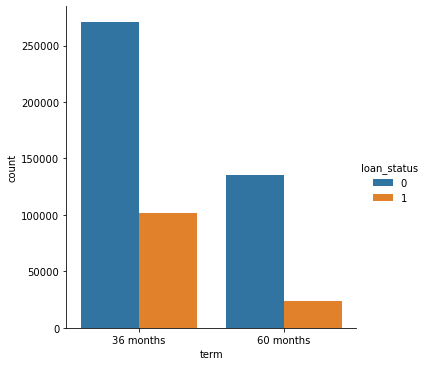

Count Plot of grade


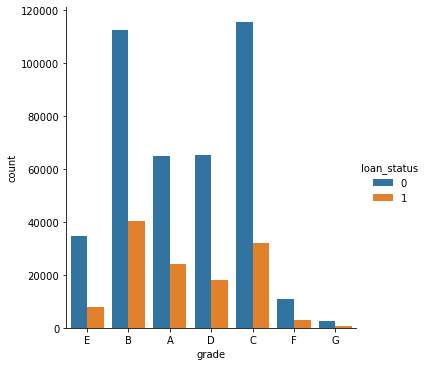

Count Plot of emp_length


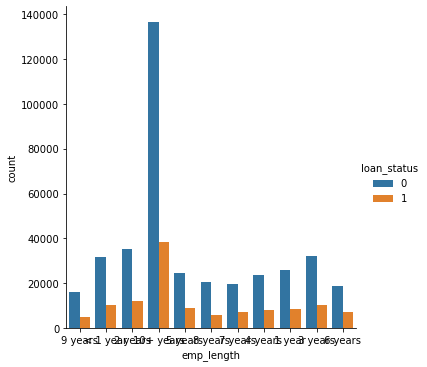

Count Plot of home_ownership


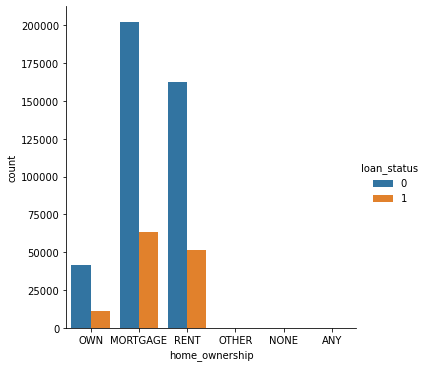

Count Plot of verification_status


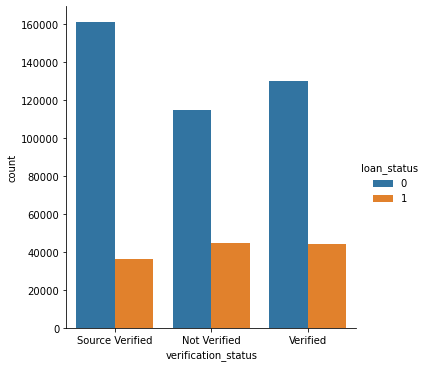

Count Plot of pymnt_plan


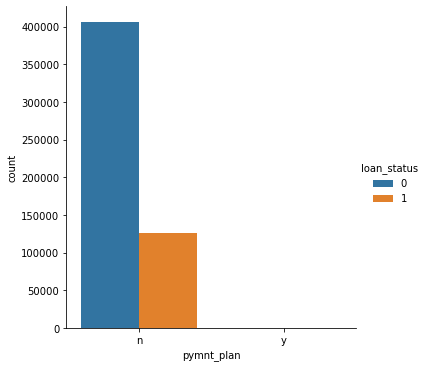

Count Plot of purpose


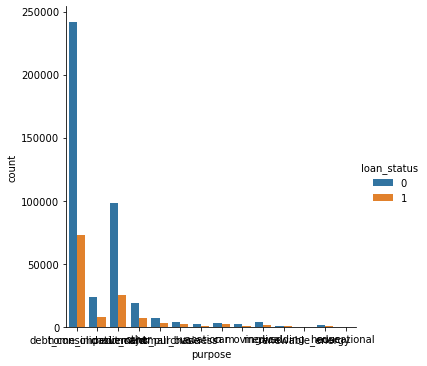

Count Plot of initial_list_status


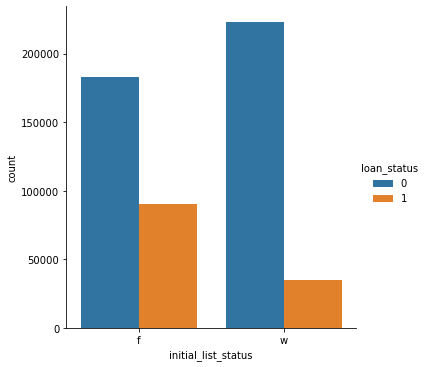

Count Plot of application_type


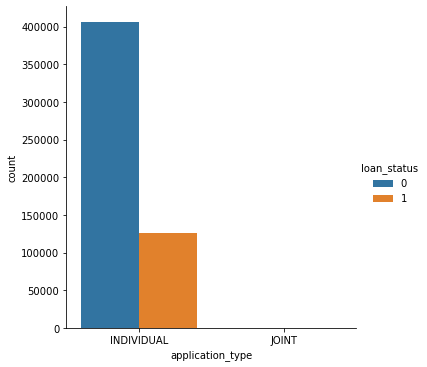

Count Plot of last_week_pay


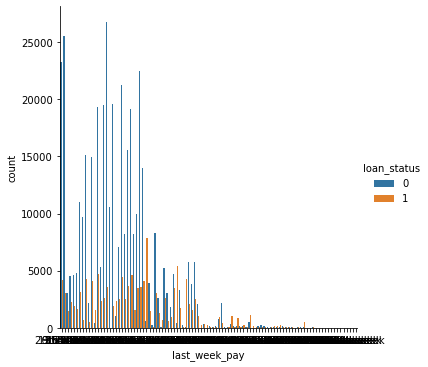

In [15]:
## Data Visualization of Categorical Variables

plt.figure(figsize = (20,7))
def Categorical_Analysis(col):  
    g = sns.catplot(x=col, hue="loan_status",data=dftrain, kind="count");
    plt.show()
for col in dftrain_cat:
    print('Count Plot of',col)
    Categorical_Analysis(col)  

#### 1. Grade

In [16]:
# clubbing grades E,F,G into others since they have very less count

dftrain['grade'].replace(['E','F','G'], 'Others', inplace=True)
dftest['grade'].replace(['E','F','G'], 'Others', inplace=True)

#### 2. emp_length

In [17]:
# Converting emp_length from categorical to numeric for analysis. <1 year and 1 year are considered as 1 
# 10+ years is considered as 10

dftrain['emp_length'].replace(to_replace=['< 1 year','1 year','2 years','3 years','4 years','5 years',  
                                          '6 years','7 years','8 years','9 years','10+ years'],
                                         value = ['1','1','2','3','4','5','6','7','8','9','10'],inplace=True)
dftest['emp_length'].replace(to_replace=['< 1 year','1 year','2 years','3 years','4 years','5 years',  
                                          '6 years','7 years','8 years','9 years','10+ years'],
                                         value = ['1','1','2','3','4','5','6','7','8','9','10'],inplace=True)

dftrain['emp_length']=pd.to_numeric(dftrain.emp_length)
dftest['emp_length']=pd.to_numeric(dftest.emp_length)

#### 3. home_ownership

In [18]:
# clubbing OTHERS,NONE,ANY into OTHERS since they have very less count

dftrain['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHERS',inplace=True)
dftest['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHERS',inplace=True)

#### 4. pymnt_plan

In [19]:
# pymnt_plan contains all the observations as only one category which will not be any significant in our analysis. 
# So, proceeding to drop this particular column

dftrain.drop('pymnt_plan',axis  =1, inplace = True)
dftest.drop('pymnt_plan',axis  =1, inplace = True)

#### 5. purpose

In [20]:
# Majority of he loans were taken for debt consolidation, home improvement and credit card
# Other purposes cnstitute very small portion. So, Other types of purposes can be clubbed together

dftrain['purpose'].replace(['other', 'major_purchase', 'small_business', 'medical','car', 
                          'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 
                          'educational'], 'Other', inplace=True)
dftest['purpose'].replace(['other', 'major_purchase', 'small_business', 'medical','car', 
                          'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 
                          'educational'], 'Other', inplace=True)

#### 6. application_type

In [21]:
# application_type contains all the observations as only one category which will not be any significant in our analysis. 
# So, proceeding to drop this particular column

dftrain.drop('application_type',axis  =1, inplace = True)
dftest.drop('application_type',axis  =1, inplace = True)

#### 7. last_week_pay

In [22]:
# Converting last_week_pay from categorical to numeric for analysis.values with NA are treated as 0

dftrain['last_week_pay'].replace(to_replace=['th week'], value='', regex=True,inplace= True)
dftrain['last_week_pay'].replace('NA', value= 0,inplace= True)
dftrain['last_week_pay']=pd.to_numeric(dftrain.last_week_pay)

dftest['last_week_pay'].replace(to_replace=['th week'], value='', regex=True,inplace= True)
dftest['last_week_pay'].replace('NA', value= 0,inplace= True)
dftest['last_week_pay']=pd.to_numeric(dftest.last_week_pay)

## Numeric Variables

In [23]:
# Defining function to create histogram of boxplot for continuous variables
def Analysis_num(col):
    print('Distribution of', col)
    sns.histplot(dftrain_num[col],kde = True)
    plt.show()
    print('\n')
    print('Boxplot of', col)
    sns.boxplot(dftrain_num[col])
    plt.show()

loan_amnt
Distribution of loan_amnt


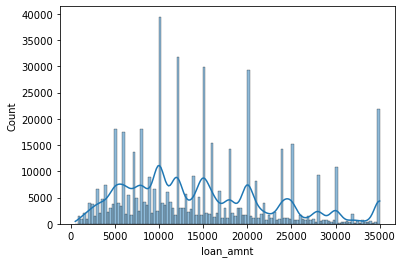



Boxplot of loan_amnt


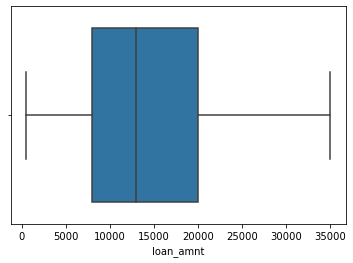

funded_amnt
Distribution of funded_amnt


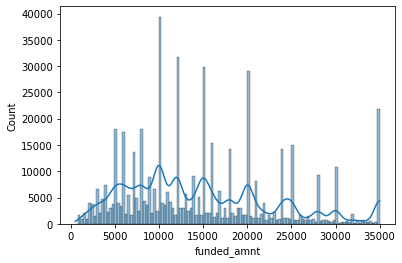



Boxplot of funded_amnt


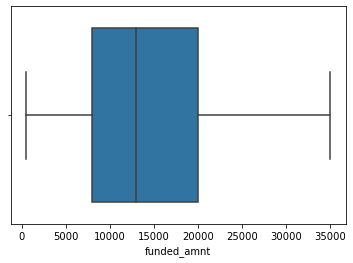

funded_amnt_inv
Distribution of funded_amnt_inv


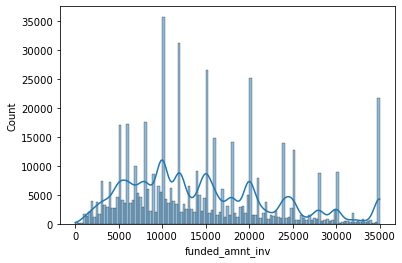



Boxplot of funded_amnt_inv


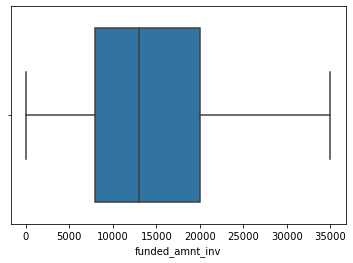

int_rate
Distribution of int_rate


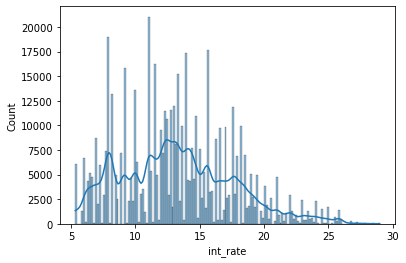



Boxplot of int_rate


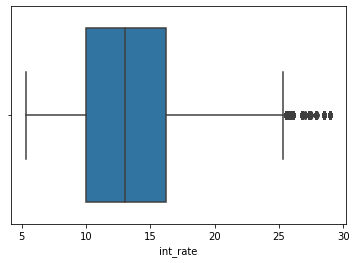

annual_inc
Distribution of annual_inc


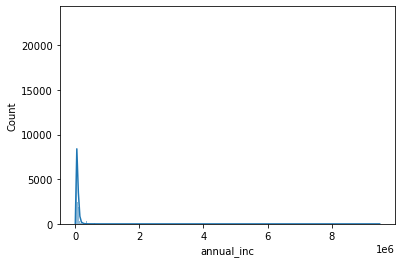



Boxplot of annual_inc


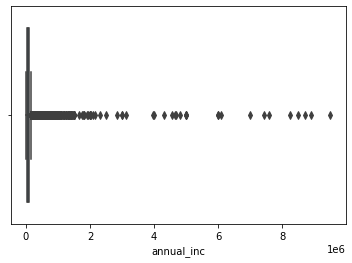

dti
Distribution of dti


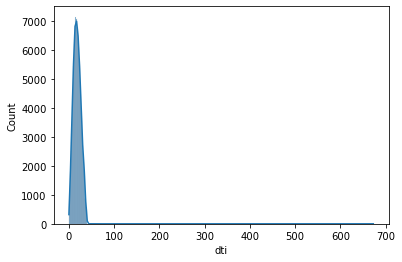



Boxplot of dti


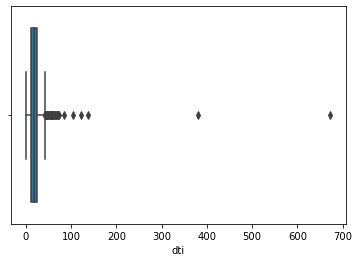

delinq_2yrs
Distribution of delinq_2yrs


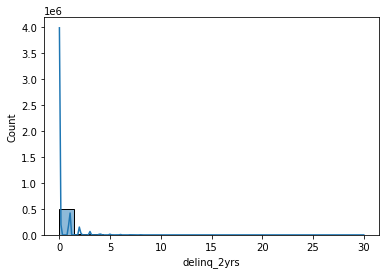



Boxplot of delinq_2yrs


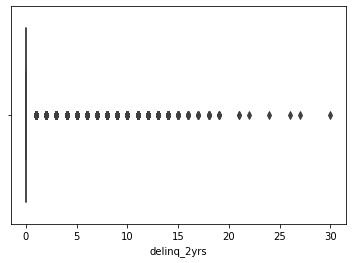

inq_last_6mths
Distribution of inq_last_6mths


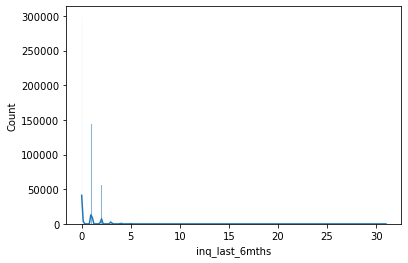



Boxplot of inq_last_6mths


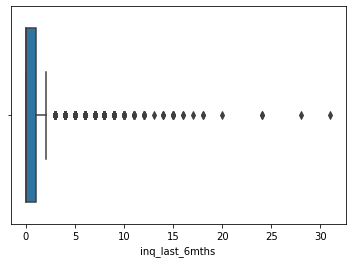

mths_since_last_delinq
Distribution of mths_since_last_delinq


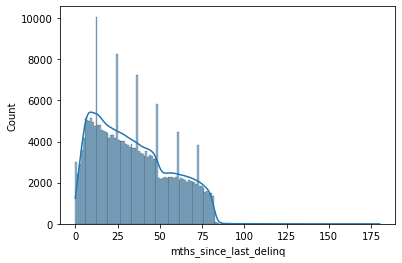



Boxplot of mths_since_last_delinq


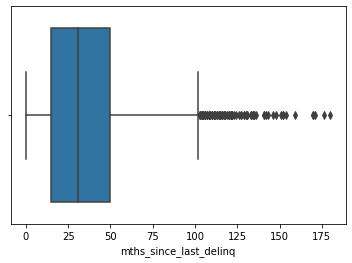

mths_since_last_record
Distribution of mths_since_last_record


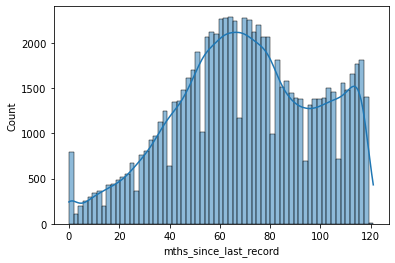



Boxplot of mths_since_last_record


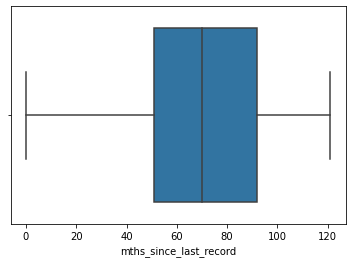

open_acc
Distribution of open_acc


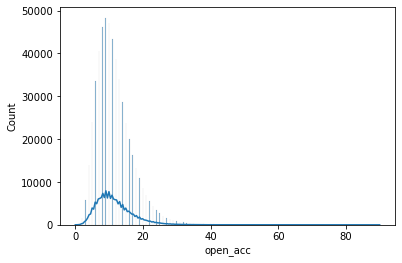



Boxplot of open_acc


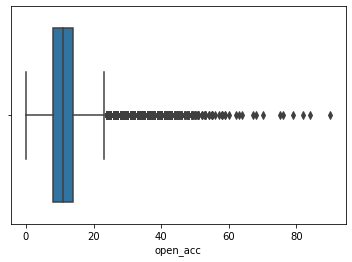

pub_rec
Distribution of pub_rec


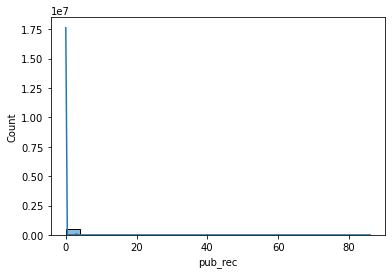



Boxplot of pub_rec


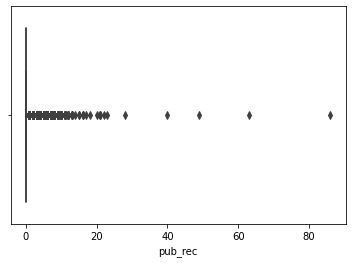

revol_bal
Distribution of revol_bal


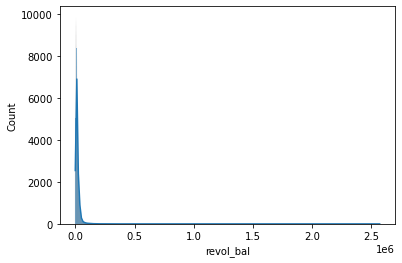



Boxplot of revol_bal


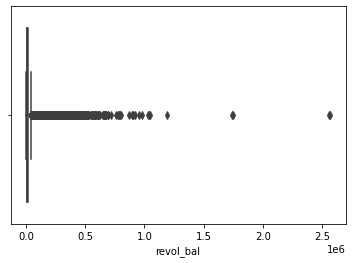

revol_util
Distribution of revol_util


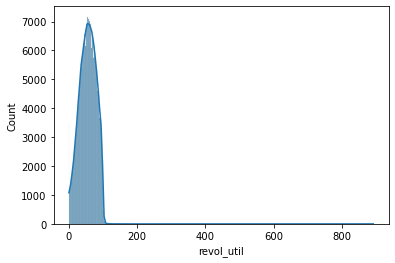



Boxplot of revol_util


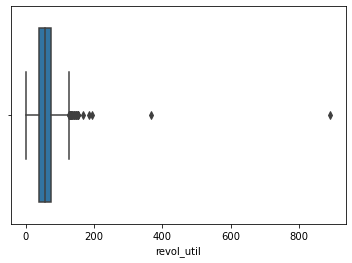

total_acc
Distribution of total_acc


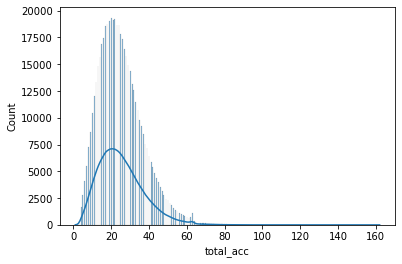



Boxplot of total_acc


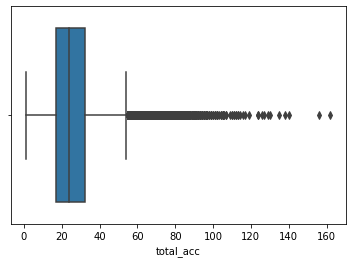

total_rec_int
Distribution of total_rec_int


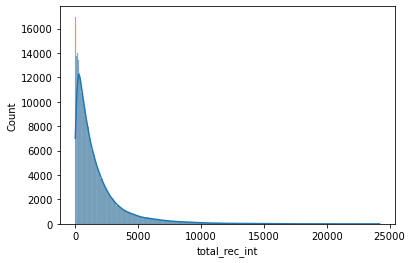



Boxplot of total_rec_int


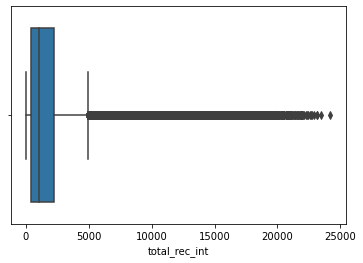

total_rec_late_fee
Distribution of total_rec_late_fee


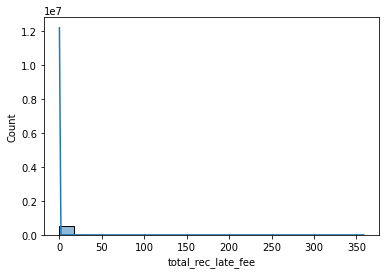



Boxplot of total_rec_late_fee


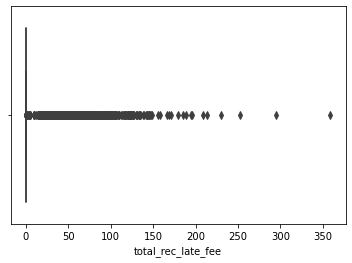

recoveries
Distribution of recoveries


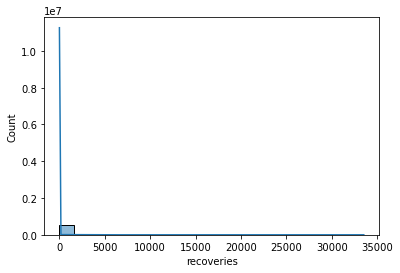



Boxplot of recoveries


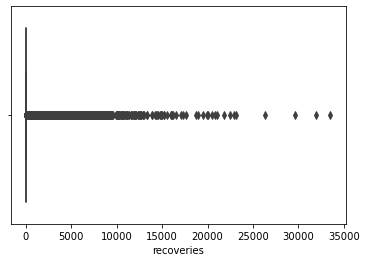

collection_recovery_fee
Distribution of collection_recovery_fee


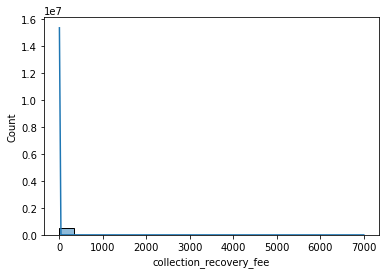



Boxplot of collection_recovery_fee


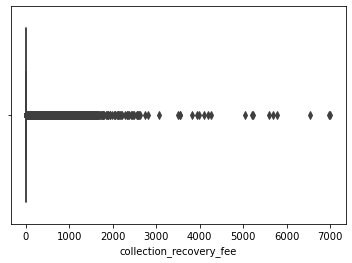

collections_12_mths_ex_med
Distribution of collections_12_mths_ex_med


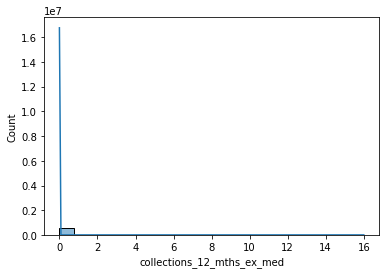



Boxplot of collections_12_mths_ex_med


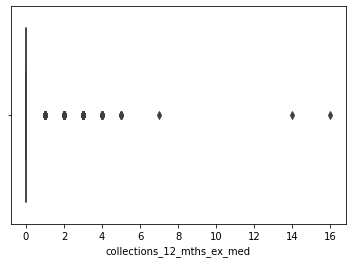

mths_since_last_major_derog
Distribution of mths_since_last_major_derog


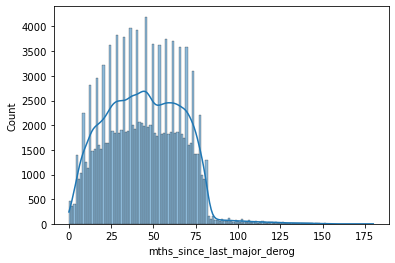



Boxplot of mths_since_last_major_derog


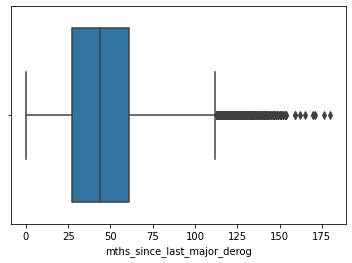

acc_now_delinq
Distribution of acc_now_delinq


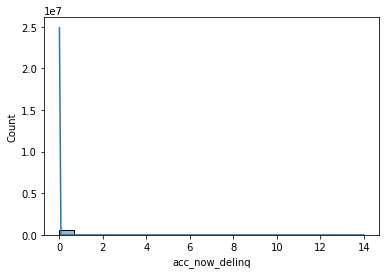



Boxplot of acc_now_delinq


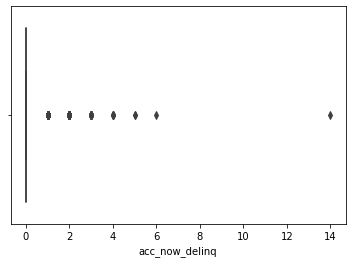

tot_coll_amt
Distribution of tot_coll_amt


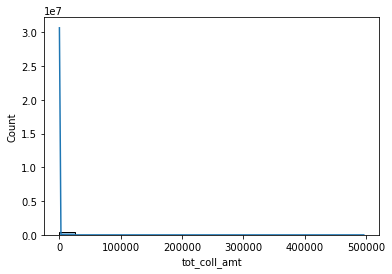



Boxplot of tot_coll_amt


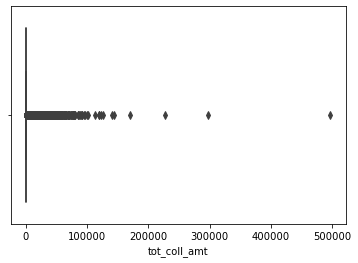

tot_cur_bal
Distribution of tot_cur_bal


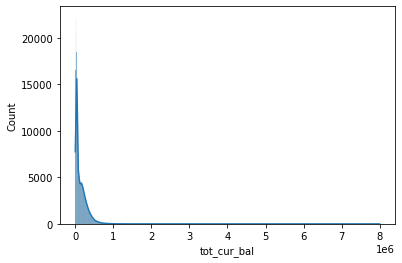



Boxplot of tot_cur_bal


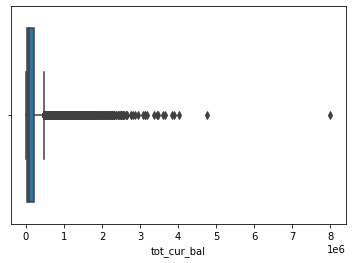

total_rev_hi_lim
Distribution of total_rev_hi_lim


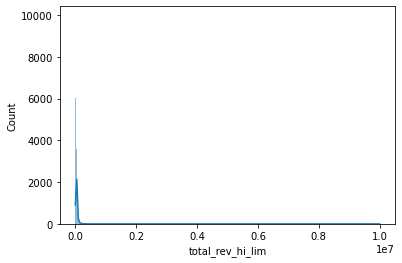



Boxplot of total_rev_hi_lim


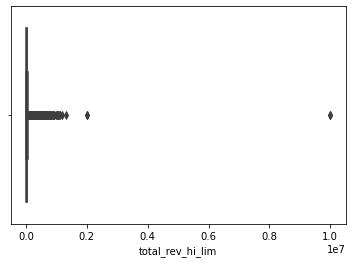

loan_status
Distribution of loan_status


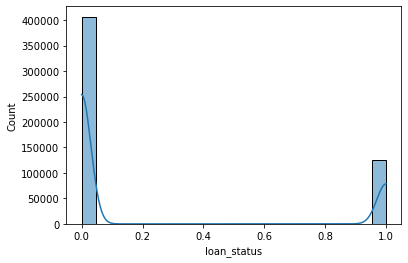



Boxplot of loan_status


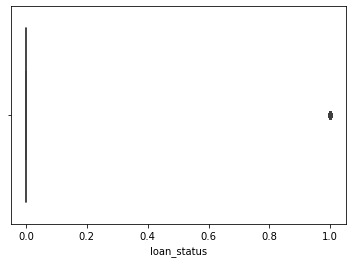

In [24]:
# Applying for numeric columns
for col in dftrain_num.columns:
    print(col)
    Analysis_num(col)

### Missing Value treatment

We can impute missing values of below columns with 0.

('delinq_2yrs','inq_last_6mths','collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq')

For others median imputation can be performed as median imputaion will not be impacted by outliers.

In [25]:
zero_imputation_cols =['delinq_2yrs','inq_last_6mths','collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq']

median_imputation_cols =['emp_length','annual_inc','open_acc','pub_rec','revol_util','total_acc','mths_since_last_delinq','mths_since_last_record','tot_coll_amt',
'tot_cur_bal','total_rev_hi_lim']

In [26]:

for col in zero_imputation_cols:
    dftrain[col].fillna(0, inplace=True)
    dftest[col].fillna(0, inplace = True)

In [27]:
for col in median_imputation_cols:    
    dftrain[col].fillna(dftrain[col].median(), inplace=True)
    dftest[col].fillna(dftest[col].median(),inplace = True)

### Encoding for Categorical Variables

In [28]:
# One hot encoding can be performed as variables are nominal type
dummy_cols=['term','grade','home_ownership','verification_status','purpose','initial_list_status']

dftrain = pd.get_dummies(dftrain, columns = dummy_cols, drop_first = True)
dftest = pd.get_dummies(dftest, columns = dummy_cols, drop_first = True)

In [29]:
# Checking for null values in training set
dftrain.isna().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
int_rate                               0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
collections_12_mths_ex_med             0
mths_since_last_major_derog            0
last_week_pay                          0
acc_now_delinq                         0
tot_coll_amt    

In [30]:
# Checking for null values in test set
dftest.isna().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
int_rate                               0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
collections_12_mths_ex_med             0
mths_since_last_major_derog            0
last_week_pay                          0
acc_now_delinq                         0
tot_coll_amt    

### Correlation

<AxesSubplot:>

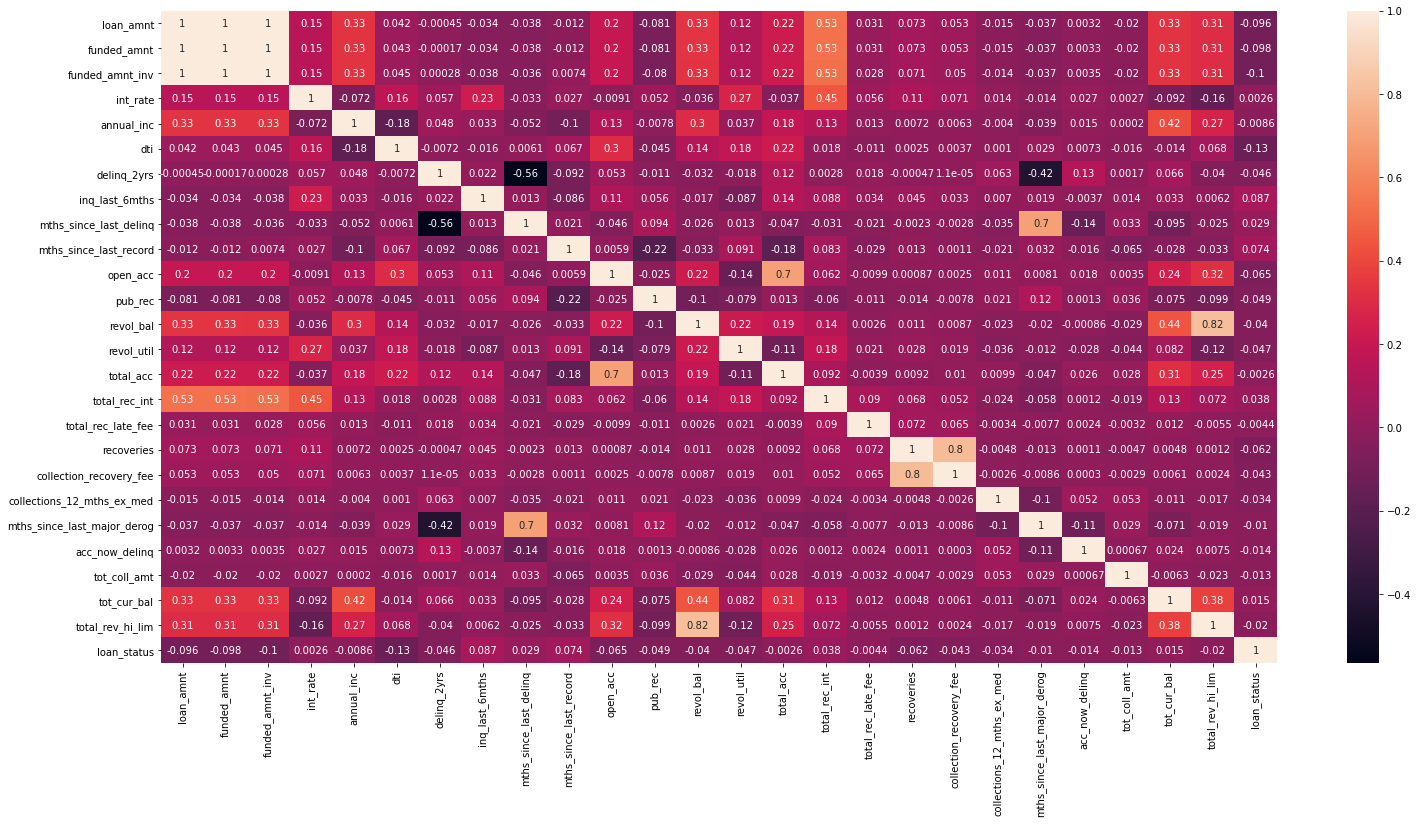

In [31]:
corr = dftrain_num.corr()
plt.figure(figsize = (25,12))
sns.heatmap(corr,annot = True)

Variables loan_amnt,funded_amnt,funded_amnt_inv exhibits strong correlation. Two of these 3 can be dropped for model building

In [32]:
# Dropig 'funded_amnt','funded_amnt_inv' columns
dftrain.drop(['funded_amnt','funded_amnt_inv'],axis = 1, inplace = True)
dftest.drop(['funded_amnt','funded_amnt_inv'],axis = 1, inplace = True)

There are no missing values in both training and test set. 
Categorical variables are encoded.
Data is ready to be used for modelling purpose.

# Model Building

### Extracting the target column into separate vectors for training set and test set

In [33]:
# Assigning all the independent variables to x and target variable to y
xtrain = dftrain.drop("loan_status", axis=1)

ytrain = dftrain.pop("loan_status")


### Checking the dimensions of the training and test data

In [34]:
# Shape of training data set
print('xtrain',xtrain.shape)

print('ytrain',ytrain.shape)


xtrain (532428, 39)
ytrain (532428,)


## Random Forest Classifier

In [35]:
# importing Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Assigning values to hyper parameters
paramgrid = {
  'max_depth': [8],#[10,6]
   'max_features': [7], #[6,8]
   'min_samples_leaf': [5000],#[10000,4000]
    'min_samples_split': [15000],#[30000,8000] 
   'n_estimators': [101]
    
}

rfcl = RandomForestClassifier()

gridsearch_rfcl = GridSearchCV(estimator = rfcl, param_grid = paramgrid, cv = 3,scoring = 'roc_auc')




Below Hyperparameters have been given as input and best parameters are selected based on the AUC score.

Considering the program run time, best parameters have been considered above.

'max_depth': [10,6,8]
    'max_features': [6,8,7]
    'min_samples_leaf': [10000,4000,5000]
    'min_samples_split': [30000,8000,15000] 
    'n_estimators': [101]

In [37]:
# Fitting the model to training set 
gridsearch_rfcl.fit(xtrain, ytrain)
print(gridsearch_rfcl.best_params_)
bestgrid_rfcl = gridsearch_rfcl.best_estimator_
bestgrid_rfcl


{'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 5000, 'min_samples_split': 15000, 'n_estimators': 101}


RandomForestClassifier(max_depth=8, max_features=7, min_samples_leaf=5000,
                       min_samples_split=15000, n_estimators=101)

In [38]:
# Predicting the output class and probabilities of training set

ytrain_predict_rfcl = bestgrid_rfcl.predict(xtrain)
ytrain_predict_prob_rfcl = bestgrid_rfcl.predict_proba(xtrain)


AUC score for RFCL model: 0.764


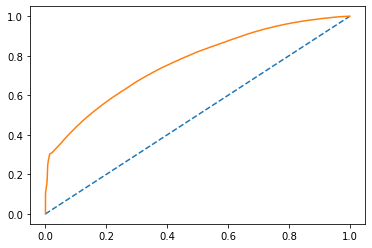

In [39]:
# keep probabilities for the positive outcome only
probsrfcl = ytrain_predict_prob_rfcl[:, 1]
# calculate AUC
rfcl_train_auc = roc_auc_score(ytrain, probsrfcl)
print('AUC score for RFCL model: %.3f' % rfcl_train_auc)
# calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(ytrain, probsrfcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr)

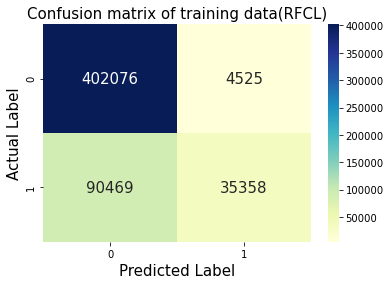

In [40]:
confusion_matrix(ytrain, ytrain_predict_rfcl)
sns.heatmap(confusion_matrix(ytrain, ytrain_predict_rfcl), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(RFCL)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [41]:
rfcl_metrics=classification_report(ytrain, ytrain_predict_rfcl,output_dict=True)
df1=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_acc = round(df1.loc["accuracy"][0],2)
rfcl_train_precision=round(df1.loc["1"][0],2)
rfcl_train_recall=round(df1.loc["1"][1],2)
rfcl_train_f1=round(df1.loc["1"][2],2)
print ('Precision of RFCL Model ',rfcl_train_precision)
print ('Recall of RFCL Model ',rfcl_train_recall)
print ('F1 Score of RFCL Model ',rfcl_train_f1)
round(df1,2)

Precision of RFCL Model  0.89
Recall of RFCL Model  0.28
F1 Score of RFCL Model  0.43


,precision,recall,f1-score,support
0,0.82,0.99,0.89,406601.00
1,0.89,0.28,0.43,125827.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.85,0.63,0.66,532428.00
weighted avg,0.83,0.82,0.78,532428.00


## Building a Neural Network Classifier

In [42]:
# importing ANN Classifier and standardizing the data
from sklearn.neural_network import MLPClassifier
sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)


In [43]:
# Assigning values to hyper parameters
paramgrid_ann = {
    'hidden_layer_sizes': [100], #[(100,100)]
    'max_iter': [5000], #[5000]
    'solver': ['adam'], #[sgd]
    'tol': [0.01], #[0.001]
    'activation' : ['relu'] #[logistic]
    
}

ann = MLPClassifier()

gridsearch_ann = GridSearchCV(estimator = ann, param_grid = paramgrid_ann, cv = 3)

Below Hyperparameters have been given as input and best parameters are selected based on the AUC score.

Considering the program run time, best parameters have been considered above.

'hidden_layer_sizes': [100], #[(100,100)]
 'max_iter': [5000], 
  'solver': ['adam'], #[sgd]
   'tol': [0.01], #[0.001]
     'activation' : ['relu'] #[logistic]

In [44]:
# Fitting the model to training set
gridsearch_ann.fit(xtrain_scaled, ytrain)
print(gridsearch_ann.best_params_)
bestgrid_ann = gridsearch_ann.best_estimator_
bestgrid_ann

{'activation': 'relu', 'hidden_layer_sizes': 100, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, tol=0.01)

In [45]:
# Predicting the output class and probabilities of training set
ytrain_predict_ann = bestgrid_ann.predict(xtrain_scaled)
ytrain_predict_prob_ann = bestgrid_ann.predict_proba(xtrain_scaled)

AUC score for ANN model: 0.844


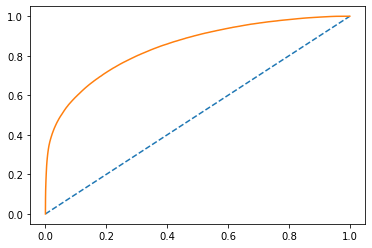

In [46]:
# keep probabilities for the positive outcome only
probsann = ytrain_predict_prob_ann[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(ytrain, probsann)
print('AUC score for ANN model: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(ytrain, probsann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)

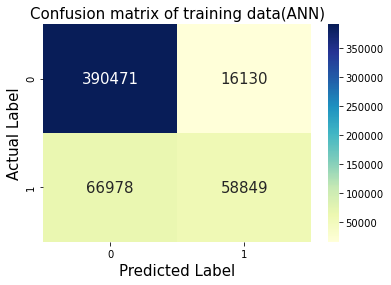

In [47]:

sns.heatmap(confusion_matrix(ytrain, ytrain_predict_ann), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(ANN)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [48]:
ann_metrics=classification_report(ytrain, ytrain_predict_ann,output_dict=True)
df2=pd.DataFrame(ann_metrics).transpose()
ann_train_acc=round(df2.loc["accuracy"][0],2)
ann_train_precision=round(df2.loc["1"][0],2)
ann_train_recall=round(df2.loc["1"][1],2)
ann_train_f1=round(df2.loc["1"][2],2)
print ('Precision of ANN Model ',ann_train_precision)
print ('Recall of ANN Model ',ann_train_recall)
print ('F1 Score of ANN Model ',ann_train_f1)
round(df2,2)

Precision of ANN Model  0.78
Recall of ANN Model  0.47
F1 Score of ANN Model  0.59


,precision,recall,f1-score,support
0,0.85,0.96,0.90,406601.00
1,0.78,0.47,0.59,125827.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.82,0.71,0.74,532428.00
weighted avg,0.84,0.84,0.83,532428.00


# Logistic Regression

In [49]:
# importing logistic Regression
from sklearn.linear_model import LogisticRegression

In [50]:
# Selecting values for hyperparaeters
paramgrid_logit = { "penalty": ['elasticnet'],
                      "C": [0.01],
                      "solver":['saga'],
                      "l1_ratio": [0.5]
                      }

logit =LogisticRegression()
gridsearch_logit = GridSearchCV(estimator=logit,
                            param_grid=paramgrid_logit,
                            cv=3,scoring='roc_auc')


In [51]:
# Fitting the model to training data
gridsearch_logit.fit(xtrain_scaled, ytrain)
print(gridsearch_logit.best_params_)
bestgrid_logit = gridsearch_logit.best_estimator_
bestgrid_logit

{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


LogisticRegression(C=0.01, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [52]:
# Predicting the output class and probabilities of training set
ytrain_predict_logit = bestgrid_logit.predict(xtrain_scaled)
ytrain_predict_prob_logit = bestgrid_logit.predict_proba(xtrain_scaled)

AUC score for Logit model: 0.775


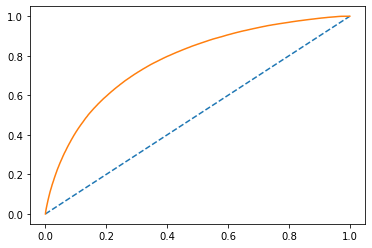

In [53]:
# keep probabilities for the positive outcome only
probslogit = ytrain_predict_prob_logit[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(ytrain, probslogit)
print('AUC score for Logit model: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(ytrain, probslogit)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

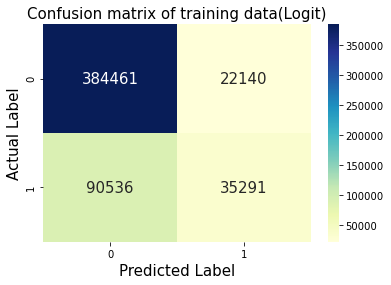

In [54]:
sns.heatmap(confusion_matrix(ytrain, ytrain_predict_logit), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(Logit)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [55]:
logit_metrics=classification_report(ytrain, ytrain_predict_logit,output_dict=True)
df3=pd.DataFrame(logit_metrics).transpose()
logit_train_acc=round(df3.loc["accuracy"][0],2)
logit_train_precision=round(df3.loc["1"][0],2)
logit_train_recall=round(df3.loc["1"][1],2)
logit_train_f1=round(df3.loc["1"][2],2)
print ('Precision of Logit Model ',logit_train_precision)
print ('Recall of Logit Model ',logit_train_recall)
print ('F1 Score of Logit Model ',logit_train_f1)
round(df3,2)

Precision of Logit Model  0.61
Recall of Logit Model  0.28
F1 Score of Logit Model  0.39


,precision,recall,f1-score,support
0,0.81,0.95,0.87,406601.00
1,0.61,0.28,0.39,125827.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.71,0.61,0.63,532428.00
weighted avg,0.76,0.79,0.76,532428.00


## Ensembling technique - Gradient Boosting

In [56]:
# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
# Fitting the model to training data
model_gbcl = GradientBoostingClassifier()
model_gbcl.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [58]:
# Predicting the output class and probabilities of training set
ytrain_predict_gbcl = model_gbcl.predict(xtrain)
ytrain_predict_prob_gbcl = model_gbcl.predict_proba(xtrain)

AUC score for Gradient Boosting model: 0.821


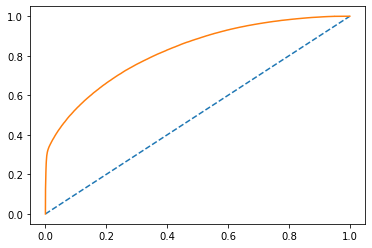

In [59]:
# keep probabilities for the positive outcome only
probsgbcl = ytrain_predict_prob_gbcl[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(ytrain, probsgbcl)
print('AUC score for Gradient Boosting model: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(ytrain, probsgbcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr)

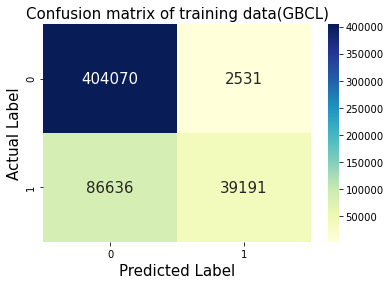

In [60]:
sns.heatmap(confusion_matrix(ytrain, ytrain_predict_gbcl), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(GBCL)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [61]:
gbcl_metrics=classification_report(ytrain, ytrain_predict_gbcl,output_dict=True)
df4=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_acc=round(df4.loc["accuracy"][0],2)
gbcl_train_precision=round(df4.loc["1"][0],2)
gbcl_train_recall=round(df4.loc["1"][1],2)
gbcl_train_f1=round(df4.loc["1"][2],2)
print ('Precision of Gradient Boosting Model ',gbcl_train_precision)
print ('Recall of Gradient Boosting Model ',gbcl_train_recall)
print ('F1 Score of Gradient Boosting Model ',gbcl_train_f1)
round(df4,2)

Precision of Gradient Boosting Model  0.94
Recall of Gradient Boosting Model  0.31
F1 Score of Gradient Boosting Model  0.47


,precision,recall,f1-score,support
0,0.82,0.99,0.90,406601.00
1,0.94,0.31,0.47,125827.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.88,0.65,0.68,532428.00
weighted avg,0.85,0.83,0.80,532428.00


## XG Boost

In [62]:
# Importing XG Boost
import xgboost as xgb

In [63]:
model_xgb = xgb.XGBClassifier(eval_metric=["auc"])
model_xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['auc'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [64]:
ytrain_predict_xgb = model_xgb.predict(xtrain)
ytrain_predict_prob_xgb = model_xgb.predict_proba(xtrain)

AUC score for Gradient Boosting model: 0.933


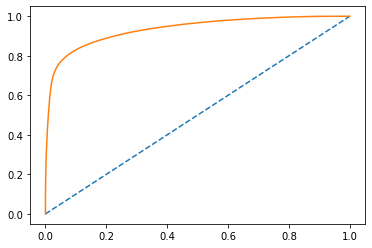

In [65]:
# keep probabilities for the positive outcome only
probsxgb = ytrain_predict_prob_xgb[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(ytrain, probsxgb)
print('AUC score for Gradient Boosting model: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(ytrain, probsxgb)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

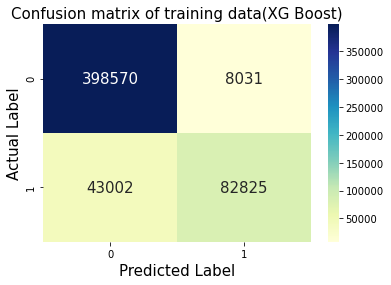

In [66]:
sns.heatmap(confusion_matrix(ytrain, ytrain_predict_xgb), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(XG Boost)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [67]:
xgb_metrics=classification_report(ytrain, ytrain_predict_xgb,output_dict=True)
df5=pd.DataFrame(xgb_metrics).transpose()
xgb_train_acc=round(df5.loc["accuracy"][0],2)
xgb_train_precision=round(df5.loc["1"][0],2)
xgb_train_recall=round(df5.loc["1"][1],2)
xgb_train_f1=round(df5.loc["1"][2],2)
print ('Precision of XG Boost Model ',xgb_train_precision)
print ('Recall of XG Boost Model ',xgb_train_recall)
print ('F1 Score of XG Boost Model ',xgb_train_f1)
round(df5,2)

Precision of XG Boost Model  0.91
Recall of XG Boost Model  0.66
F1 Score of XG Boost Model  0.76


,precision,recall,f1-score,support
0,0.90,0.98,0.94,406601.0
1,0.91,0.66,0.76,125827.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.91,0.82,0.85,532428.0
weighted avg,0.90,0.90,0.90,532428.0


# Final Conclusion

## Comparison of the performance metrics from the 5 models

In [68]:
index=['AUC','Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rfcl_train_auc,rfcl_train_acc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Artificial Neural Network Train':[ann_train_auc,ann_train_acc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Logistic Train':[logit_train_auc,logit_train_acc,logit_train_recall,logit_train_precision,logit_train_f1],
         'Gradient Boosting Train': [gbcl_train_auc,gbcl_train_acc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],   
        'XG Boost Train': [xgb_train_auc,xgb_train_acc,xgb_train_recall,xgb_train_precision,xgb_train_f1]},index = index)                     
      
round(data,2)

,Random Forest Train,Artificial Neural Network Train,Logistic Train,Gradient Boosting Train,XG Boost Train
AUC,0.76,0.84,0.77,0.82,0.93
Accuracy,0.82,0.84,0.79,0.83,0.90
Recall,0.28,0.47,0.28,0.31,0.66
Precision,0.89,0.78,0.61,0.94,0.91
F1 Score,0.43,0.59,0.39,0.47,0.76


Out of 5 models, XG Boost model has given better AUC score of 0.93. 

So, Predicting the probability of deafault of test data using XG Boost model

## Predicting the probability of test data

In [69]:
ytest = model_xgb.predict(dftest)
ytestprob = model_xgb.predict_proba(dftest)
y = pd.DataFrame({'member_id' : test_memeber_id,
                 'loan_status' : ytestprob[:,1]})

In [70]:
y.to_csv(r'C:\Users\GANGU\Documents\Great Learning\Eunimart\Loandefault1.csv',index = False)

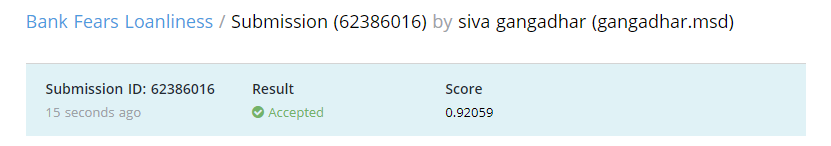

### Test set has given AUC score of 0.92 for XG Boost model